## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm

## Steps to be followed:
   1. Reading, understanding and visualising the data
   2. Prep the data for modeling(train-test split, rescaling, etc)
   3. Training the model
   4. Residual analysis
   5. Prediction and evaluation of test set

## Assumptions for Linear Regression
   <ol>
       <li>Linearity</li>
       <li> Normality of error  </li>
       <li> Homoscedasity      </li>    
    <li> Independence of error </li>
    </ol>

## Step 1: Reading/Understanding the Data 

In [2]:
data = pd.read_csv("./day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
print(data.shape)

(730, 16)


Data contains
   - 730 rows
   - 16 columns
       - instant
       - dteday
       - season
       - yr
       - mnth
       - holiday
       - weekday
       - workingday
       - weathersit
       - temp
       - atemp
       - hum
       - windspeed
       - casual
       - registered
       - cnt

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Looking at data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The data types look to be all in order<br>
There seem to be no missing values in the columns

In [7]:
data.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

Description by looking at the data
   - instant    : All unique values 
   - dteday     : All unique values
   - season     : 4 seasons [Spring, Summer, Fall, Winter]
   - yr         : 2 Years [0=2018, 1=2019]
   - mnth       : 12 Months [1-12 = Jan-Dec]
   - holiday    : 2 Values [0= Not Holiday, 1= Holiday]
   - weekday    : 7 days [0-6 = Tue-Mon]
   - workingday : 2 Values [0=Not Working Day, 1=Working Day]
   - weathersit : 3 Values [0=Ideal, 1=Misty, 2=Light Snow]
   - temp       : Temp range values between 2.42-35.32
   - atemp      : atemp range values between 3.95-42.04
   - hum        : humidity range values between 0-97.25
   - windspeed  : wind speed range values between 1.50-34.00
   - casual     : casual riders
   - registered : registered riders
   - cnt        : Our Target Variable (Also sum of casual and registered riders)

As we can see columns <u>instant</u> and <u>dteday</u> have all values unique so they will not be useful for our analysis<br>

In [8]:
unique_cols = ['instant', 'dteday']

Also looking at the data dictionary our target <u>cnt</u> is a sum of <u>casual</u> and <u>registered</u> so both of these columns need to be removed.

In [9]:
data.drop(unique_cols, axis=1, inplace=True)
data.drop(['casual', 'registered'], axis=1, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
#shape of the data
data.shape

(730, 12)

After removing columns <b>[instant, dteday, casual and registered]</b>, we have
   - 730 rows
   - 12 columns

### Looking at relations of variables

<Figure size 1440x3600 with 0 Axes>

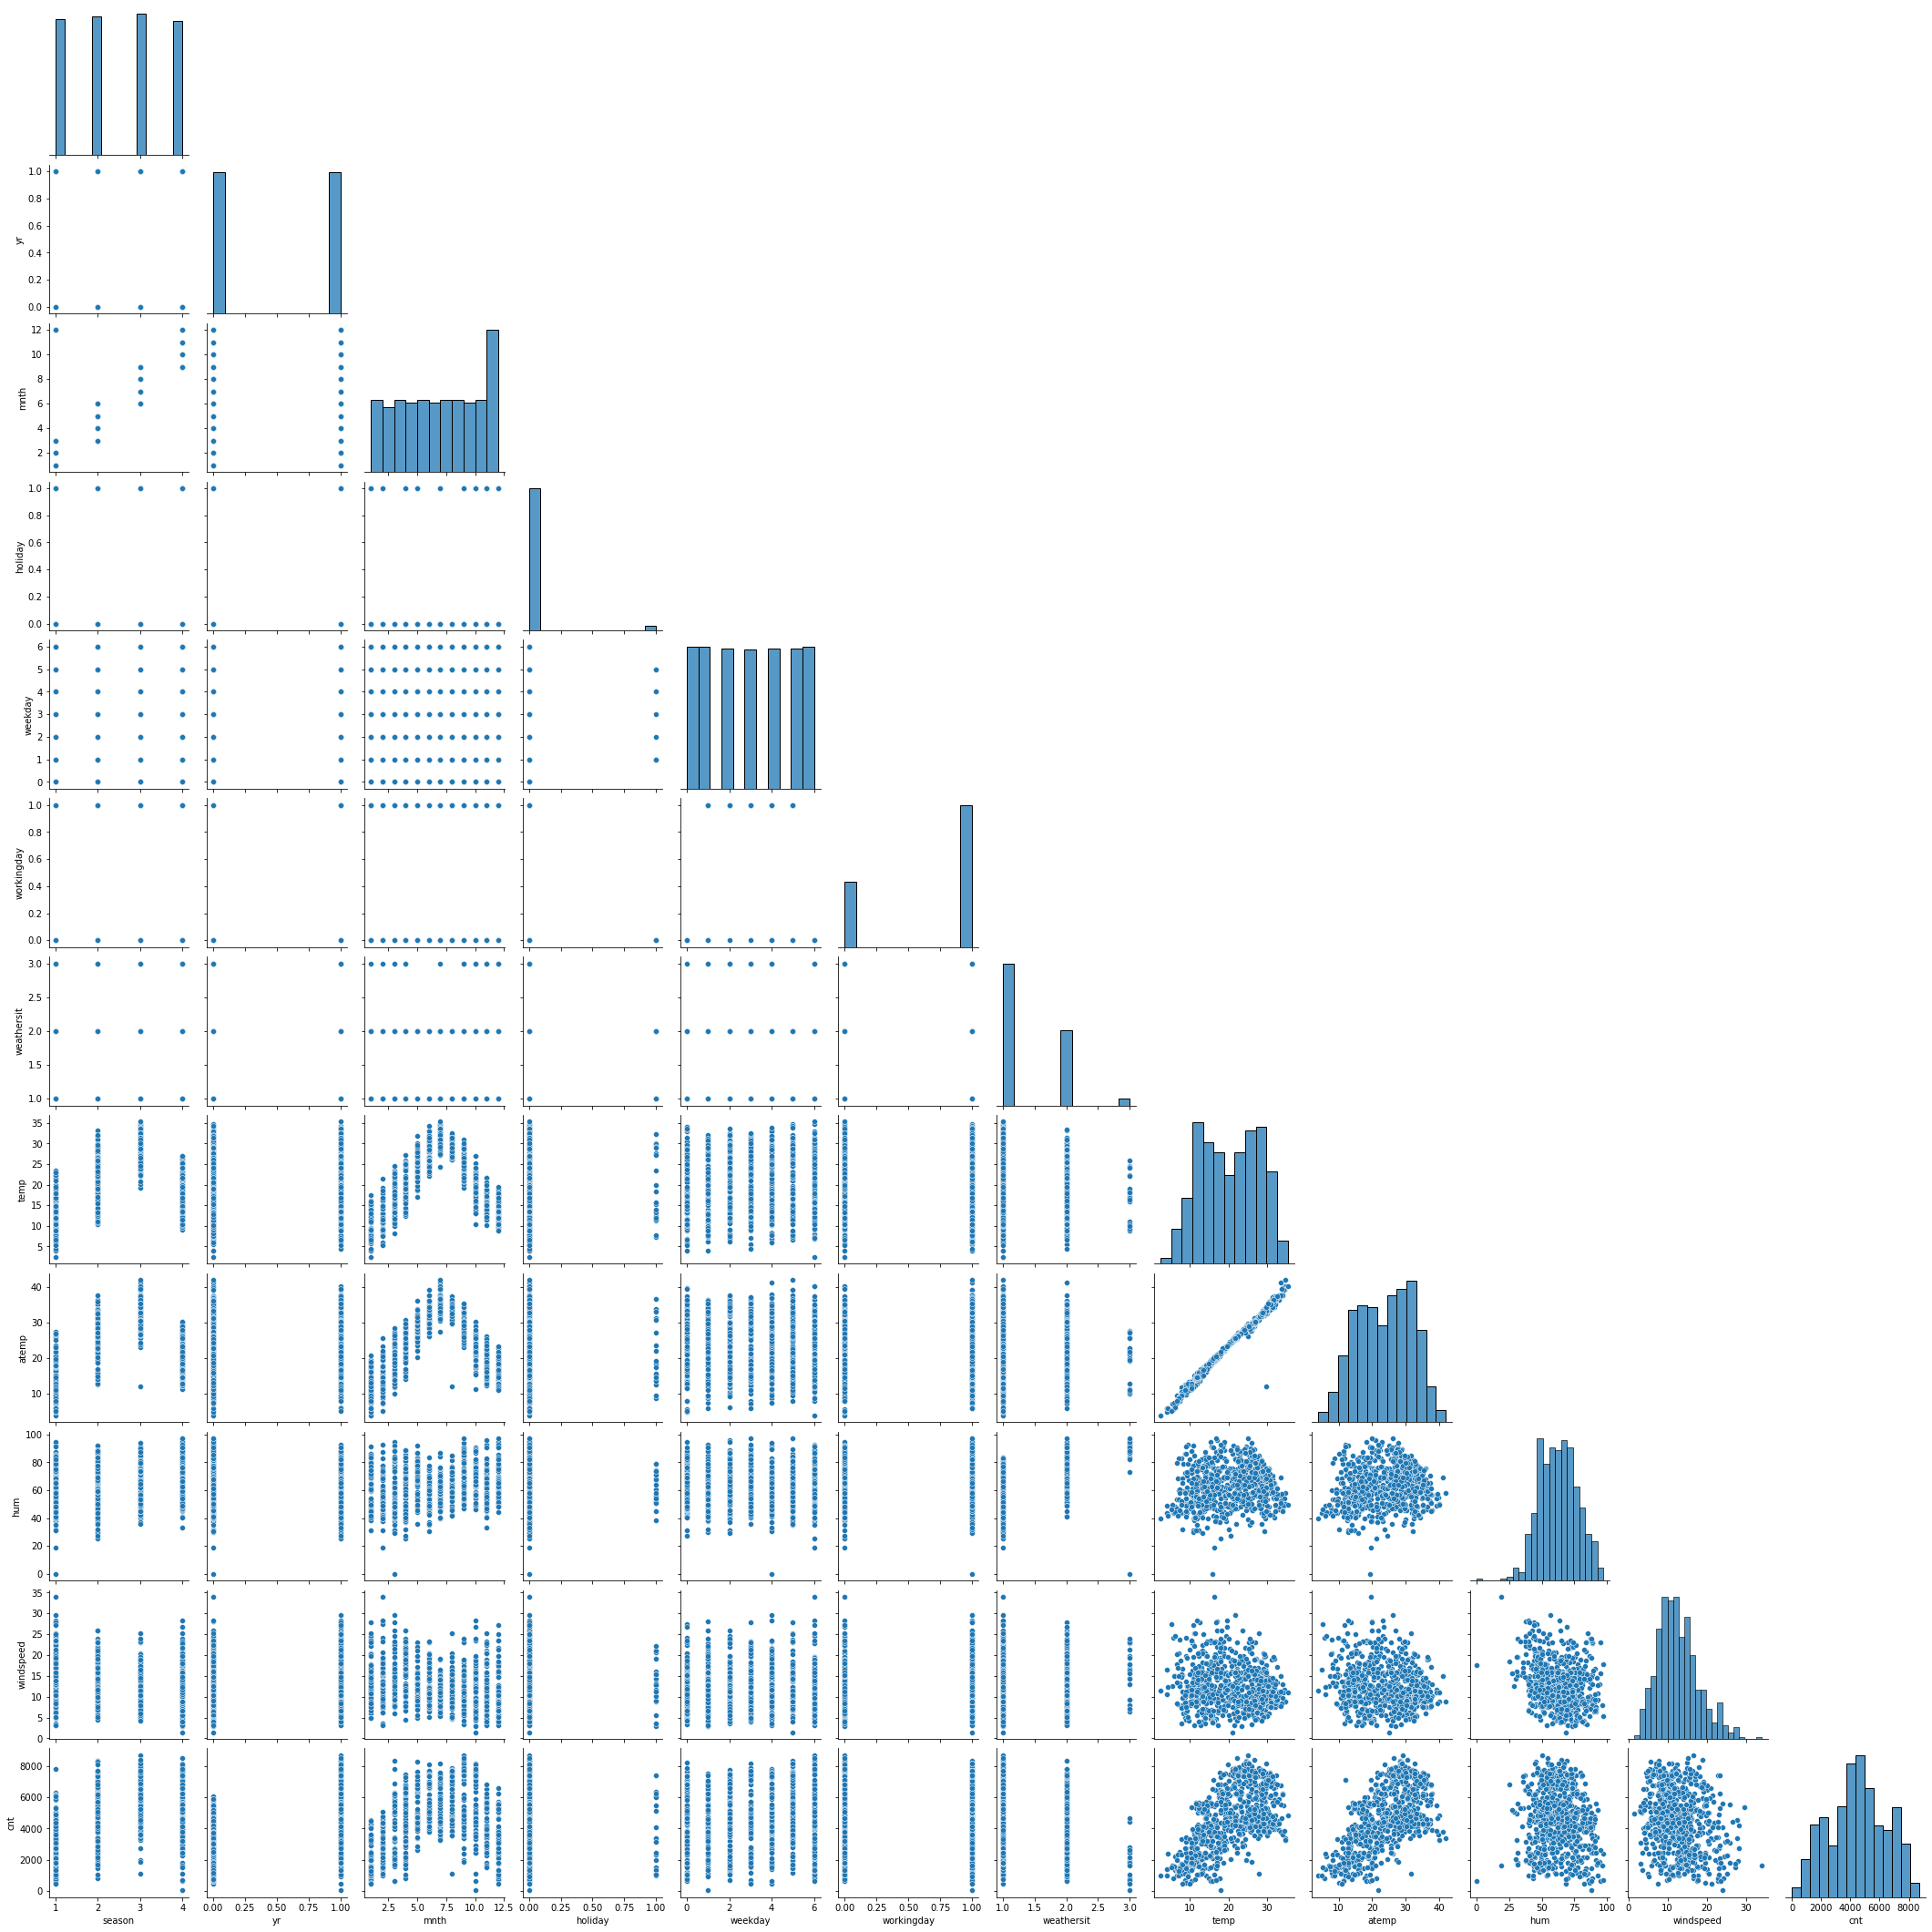

In [11]:
#all vaiables
plt.figure(figsize=(20, 50))
sns.pairplot(data, corner=True)

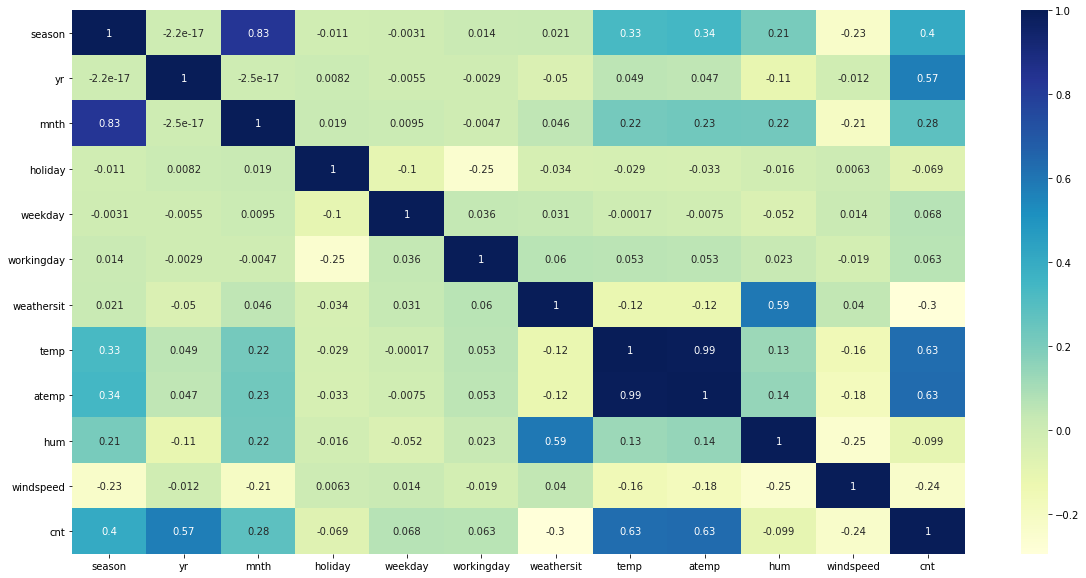

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

### A few observations
<b>cnt</b> and <b>yr</b> have a correlation of 57%<br>
   <ul> numbers of users improves as time passes by more and more popularity is gained </ul>
<b>cnt</b> and <b>temp</b>/<b>atemp</b> have a correlation of 63%
   <ul> as temperature rise, it is sure that it would affect the usage</ul>
<b>season</b> and <b>mnth</b> have a correlation of 83%
   <ul> seasons are usually followed month wise, thus the strong correlation</ul>
<b>hum</b> and <b>weathersit</b> have a correlation of 59%
   <ul> weather situation as it gets worse towards snowy the humidity is set to be increasing</ul>
<b>temp</b> and <b>atemp</b> have similar correlations with all the variables also they among themselves have a 99% of correlation, thus they are redundant information<br>
   <ul> actual temperature and feel temperature are highly correlated, thus explains the 99%.</ul>

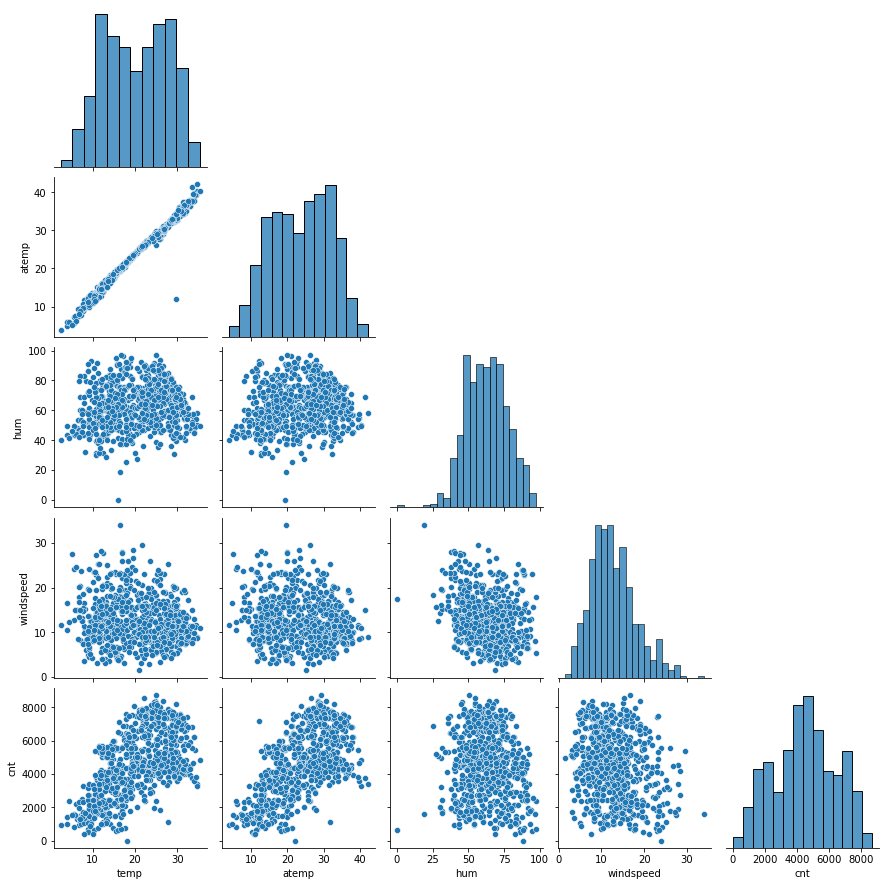

In [13]:
#quantitaive variables
sns.pairplot(data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], corner=True)

<b>cnt</b> seems to have an approx linear relation with temp, atemp, hum and windspeed too thus doing the linear regression on it actually makes sense<br>
<br>
<b>temp</b> and <b>atemp</b> have a tight fiting, supporting our previous claims of high correlation<br>
<b>hum</b> and <b>windspeed</b> seems to be slightly negatively related, which makes sense scientifically, as below
   - The speed at which air flows over the surface of water affects the rate of evaporation. Humidity depends upon the amount of vapor present in the air. so, the higher wind speed causes minimum evaporation of water and low humidity and lower wind speed cause maximum evaporation of water and high humidity. (<a href="https://www.geeksforgeeks.org/effects-of-relative-humidity-and-wind-speed/#:~:text=Solution%3A-,The%20speed%20at%20which%20air%20flows%20over%20the%20surface%20of,of%20water%20and%20high%20humidity">Check Here</a>)<br>

<b>temp v/s atemp</b><br>
<u>temp</u> and <u>atemp</u> have very high correlation thus will provide very redundant data for our analysis<br>
We are choosing to drop <u>atemp</u>

In [14]:
data.drop('atemp', axis=1, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [15]:
data.shape

(730, 11)

After removing unwanted column, we have
   - 730 rows
   - 11 columns

Sanity Check

humidity, windspeed needs to be positive quantity

In [16]:
data[data['hum']<=0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
68,1,0,3,0,4,1,3,15.952731,0.0,17.545759,623


Need to remove update this with the median value

In [17]:
data[data['hum']==0]['hum'] = data['hum'].median()
data.shape

(730, 11)

In [18]:
data[data['windspeed']<=0]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt


### Data Analysis

#### Plotting functions

In [19]:
def getScatter(y, data, x='cnt'):
    plt.figure(figsize=(20, 21))
    for i in range(len(y)):
        plt.subplot(len(y), 2, (2*i)+1)
        plt.scatter(data[x], data[y[i]])
        plt.xlabel('Count')
        plt.ylabel(y[i])
        plt.subplot(len(y), 2, (2*i)+2)
        sns.regplot(data[x], data[y[i]], line_kws={"color": 'red'})
        plt.xlabel('Count')
        plt.ylabel(y[i])
    plt.show()

def getBar(x, x_ticks, data):
    plt.figure(figsize=(7, 10))
    
    plt.subplot(2, 1, 1)
    sns.barplot(x=x, y='cnt', data=data)
    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=45)
    plt.xlabel(x)
    plt.ylabel('Count')

    plt.subplot(2, 1, 2)
    sns.boxplot(x=x, y='cnt', data=data)
    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=45)
    
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.tight_layout()
    
def getGraph(x, x_ticks, data):
    plt.figure(figsize=(20,5))
    sns.barplot(x=x, y='cnt', hue='yr',data=data, estimator=np.mean)
    labels = plt.legend(title='Year', bbox_to_anchor=(1, 1.02), loc='upper left')
    labels.get_texts()[0].set_text("2018")
    labels.get_texts()[1].set_text("2019")
    plt.xticks(np.arange(len(x_ticks)), x_ticks, rotation=45)
    plt.xlabel(x)
    plt.ylabel('Count')
    plt.show()

#### numerical variables vs cnt variable plots

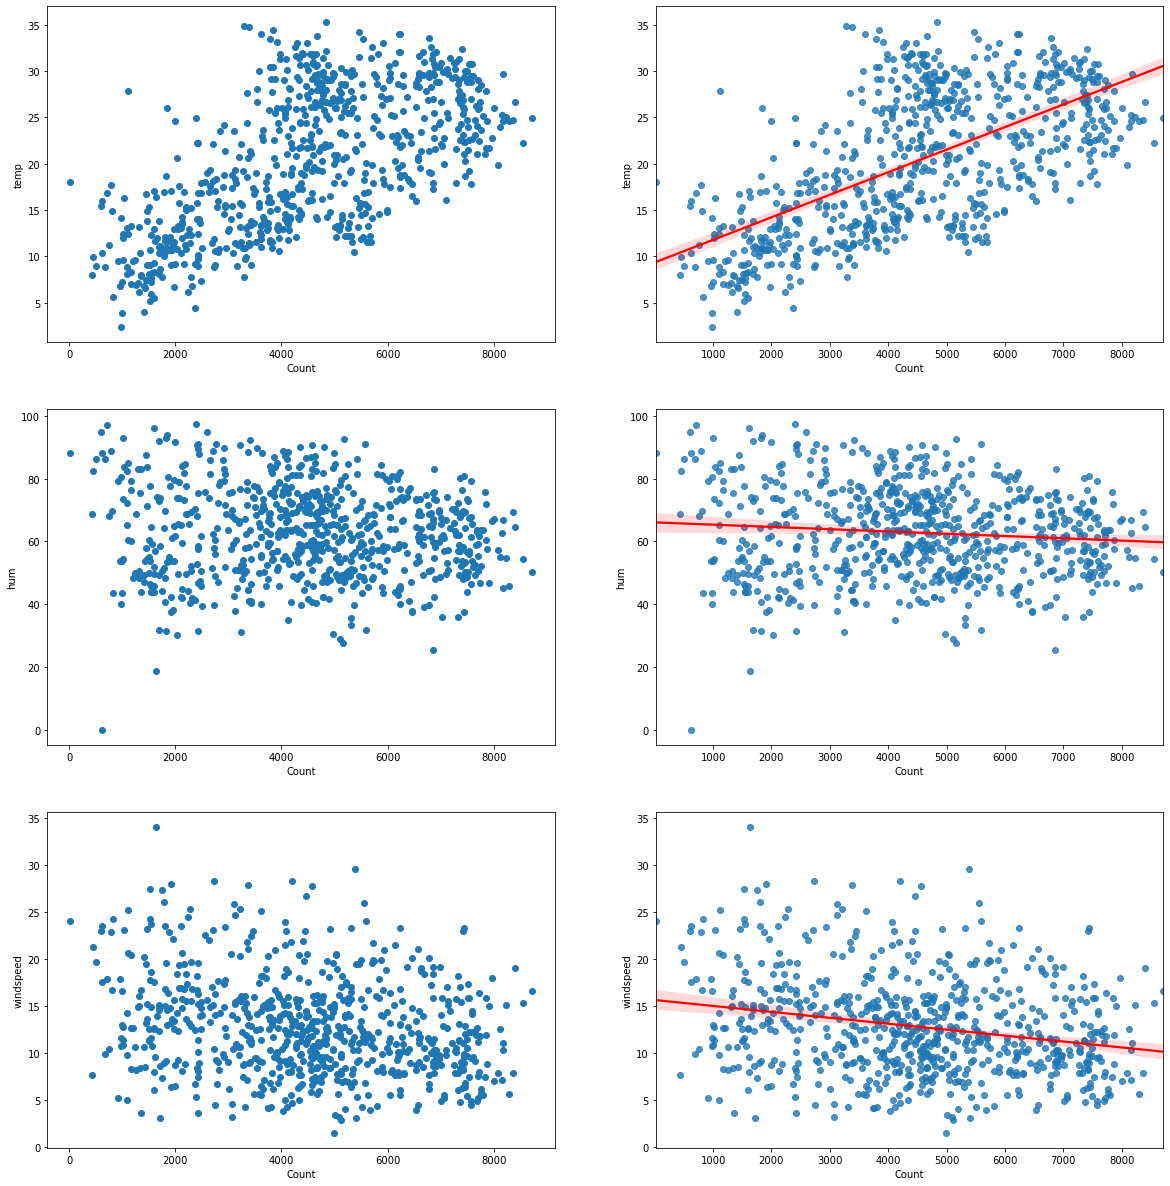

In [20]:
getScatter(['temp', 'hum', 'windspeed'], data)

### Assumption 1: Linearity
Give the linearily of the data a confirmation - <u>we can use linear regression on it</u><br>
<b>cnt</b> <u>increase</u> as: 
   - <b>temp</b> <u>increases</u>
   - <b>hum</b> <u>decreases</u>
   - <b>windspeed</b> <u>decreases</u>   

#### categorical variable

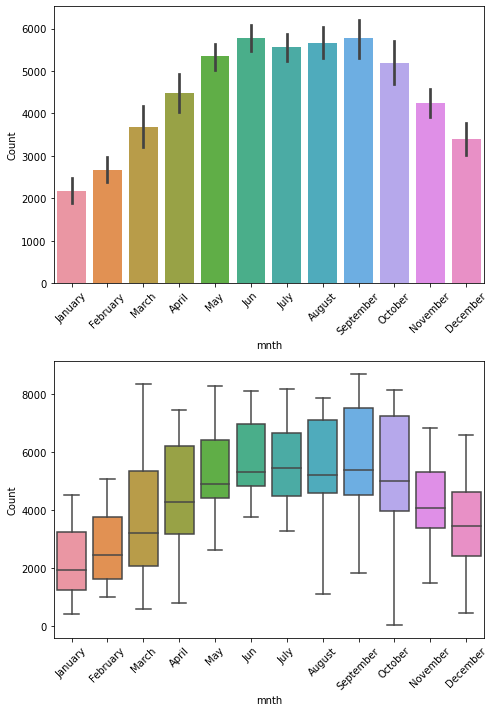

In [21]:
getBar('mnth',
       ['January', 'February', 'March', 'April', 'May', 'Jun', 'July', 'August', 'September', 'October', 'November', 'December'],
       data)

Month wise:
   - there is a increase in user counts during may - september: it can be due to holiday season 

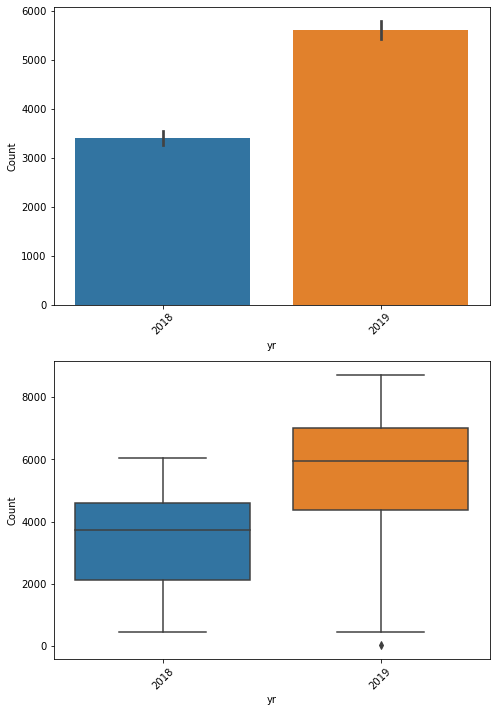

In [22]:
getBar('yr', ['2018', '2019'], data)

Year Wise:
   - there is an increase in usage from 2018 to 2019: as popularity increases it is set to increase the usage

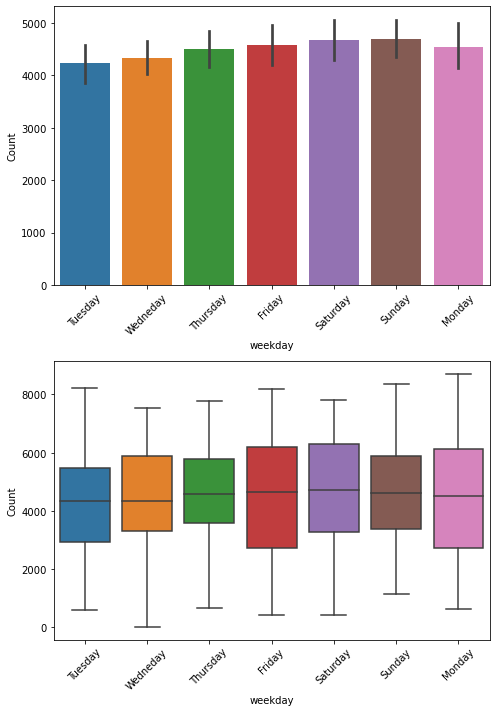

In [23]:
getBar('weekday', ['Tuesday', 'Wedneday','Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'], data)

Weekday wise:
   - there is not much variation as per weekdays: usages is constant as users can be using the bike constantly

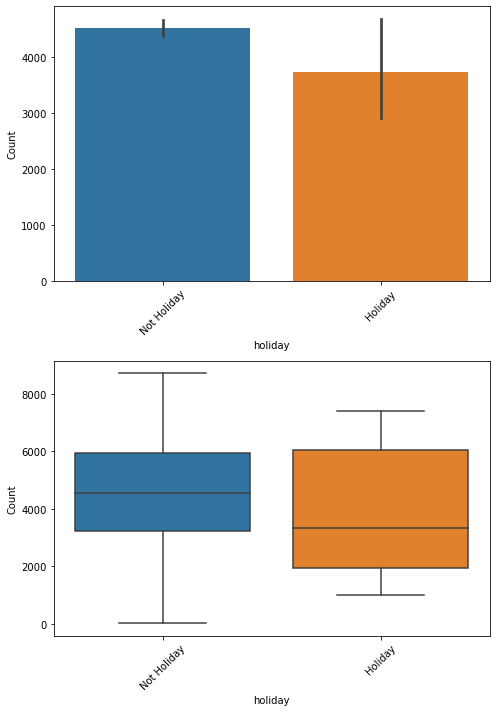

In [24]:
getBar('holiday', ['Not Holiday', 'Holiday'], data)

Holiday:
   - Usage is more during non-holidays: usage seems to be for users for commuting to work/studies

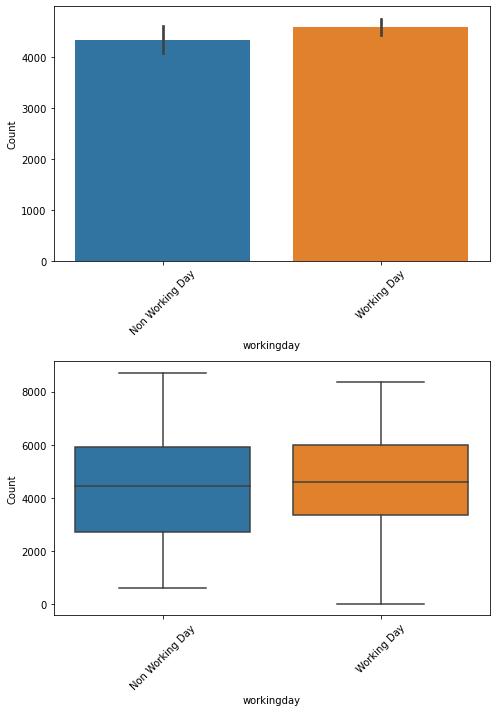

In [25]:
getBar('workingday', ['Non Working Day', 'Working Day'], data)

Working day:
   - Working days see more usage marginally: it seems commuting is more use for this bike rentals
   - There is not much different in usage count: Showing the usage is almost constant

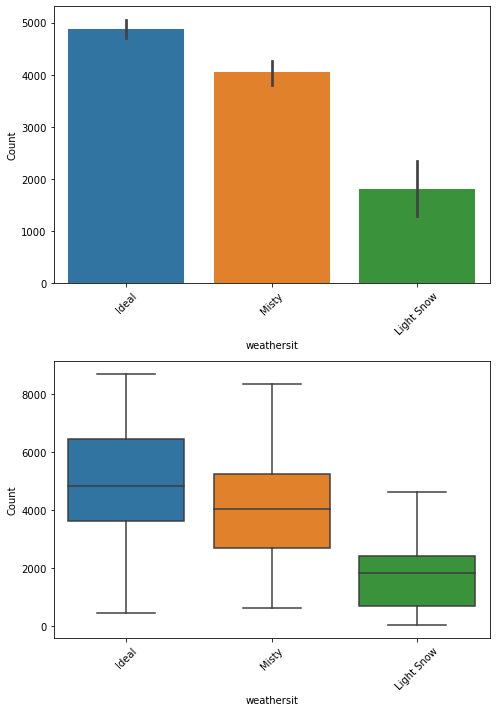

In [26]:
getBar('weathersit', ['Ideal', 'Misty', 'Light Snow'], data)

Weather Situation:
   - Ideal conditions and misty has most usage: Bike usage is much better during clear or near clear conditions rather than during snowy weather

<AxesSubplot:>

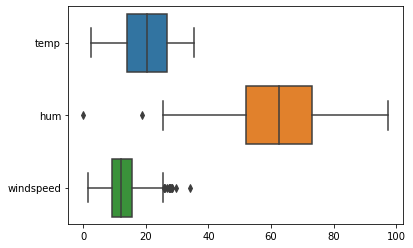

In [27]:
# sns.boxplot(data=data[['temp' ,'hum', 'windspeed']].describe(), orient='h')
sns.boxplot(data=data[['temp' ,'hum', 'windspeed']], orient='h')

Numerical Variables:
   - temp has a good variation under 40
   - windspeed has good variation under 40
   - humidity seems to have a good variation 20 and 100

<AxesSubplot:xlabel='cnt', ylabel='Density'>

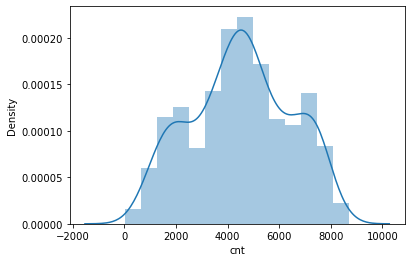

In [28]:
sns.distplot(data['cnt'])

count - seems to be following a a smooth curve

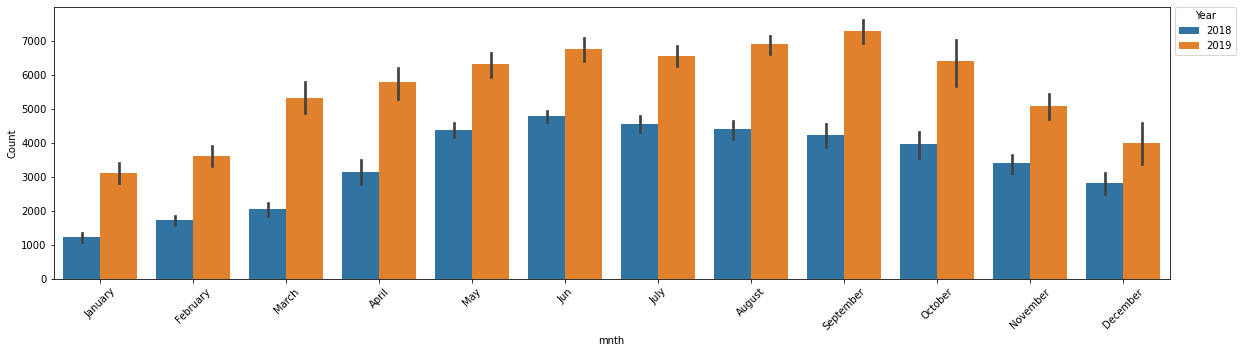

In [29]:
getGraph('mnth',
       ['January', 'February', 'March', 'April', 'May', 'Jun', 'July', 'August', 'September', 'October', 'November', 'December'],
       data)

Variable: <b>mnth</b>
<br><u>Observations</u>:
<br>The pattern still holds in both years, though number of users in 2019 increased from 2018.
<br>The trend seems to continue with a rise in users during months of may to sep.
<br>March and September seems to have recieved a higher percentage of growth compared to other months in number of users.
<br><u>Analysis</u>:
<br>Popularity increase might have caused more users to join in in 2019.
<br>It can be due to holiday season.

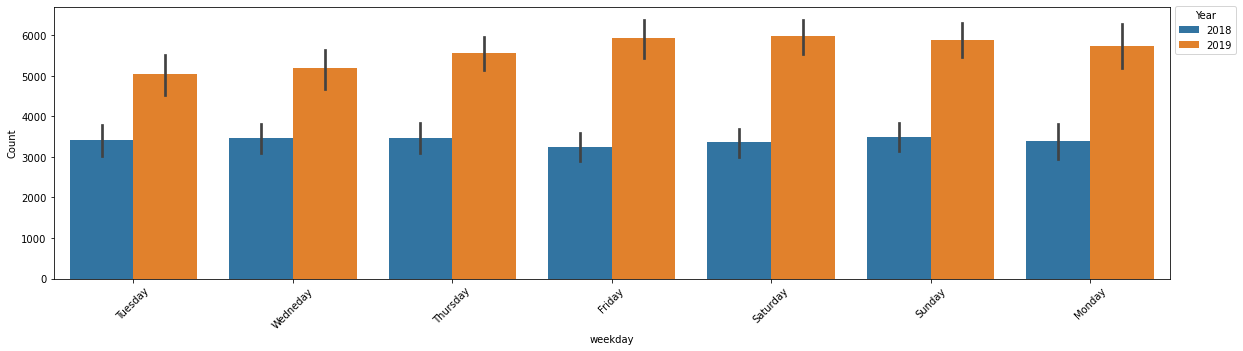

In [30]:
getGraph('weekday', ['Tuesday', 'Wedneday','Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'], data)

Variable: <b>weekday</b>
<br><u>Observations</u>:
<br>The pattern still holds in both years, though number of users in 2019 increased from 2018.
<br>The patter continues throughout the weekend being almost constant users.
<br><u>Analysis</u>:
<br>Popularity increase might have caused more users to join in in 2019.
<br>usages is constant as users can be using the bike constantly for commuting.

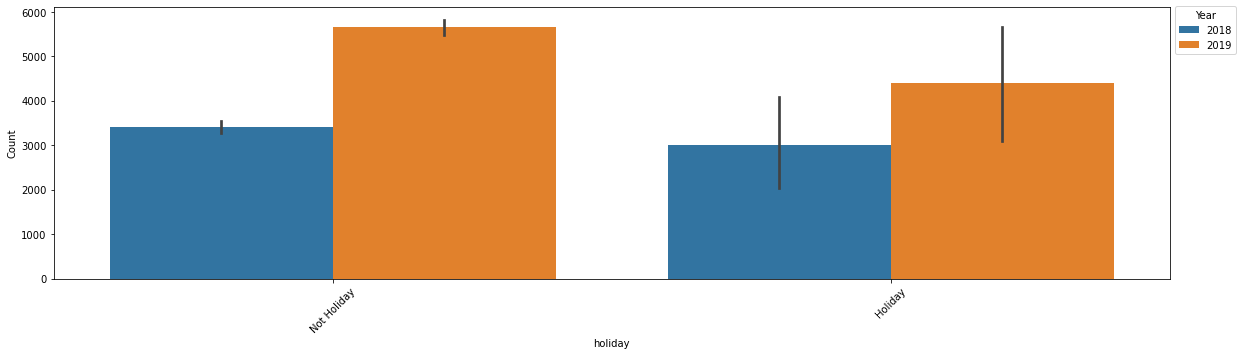

In [31]:
getGraph('holiday', ['Not Holiday', 'Holiday'], data)

Variable: <b>holiday</b>
<br><u>Observations</u>:
<br>The pattern still holds in both years, though number of users in 2019 increased from 2018.
<br>Non Holiday usage is more than holiday usage.
<br><u>Analysis</u>:
<br>Popularity increase might have caused more users to join in 2019.
<br>usage seems to be for users for commuting to work/studies.

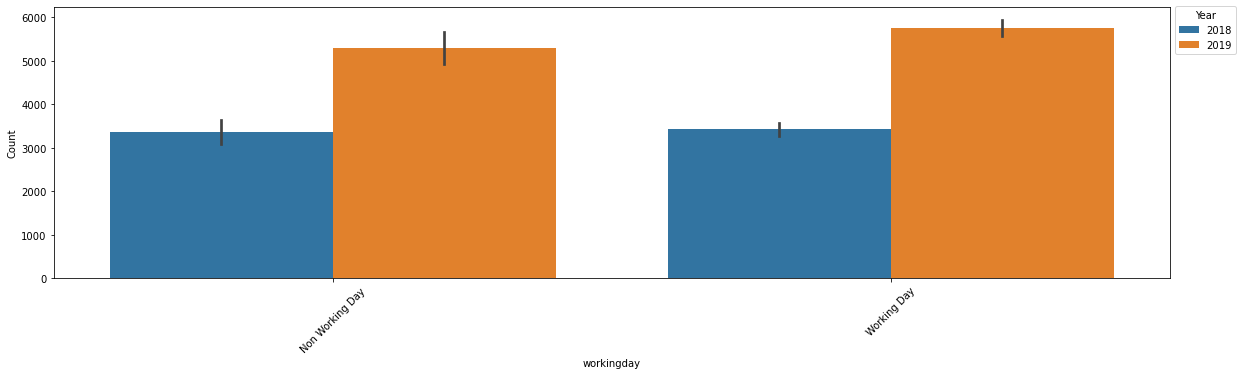

In [32]:
getGraph('workingday', ['Non Working Day', 'Working Day'], data)

Variable: <b>workingday</b>
<br><u>Observations</u>:
<br>The pattern still holds in both years, though number of users in 2019 increased from 2018.
<br>Working day usage is marginally more than non working day usage.
<br><u>Analysis</u>:
<br>Popularity increase might have caused more users to join in in 2019.
<br>usage seems to be for users for commuting to work/studies.

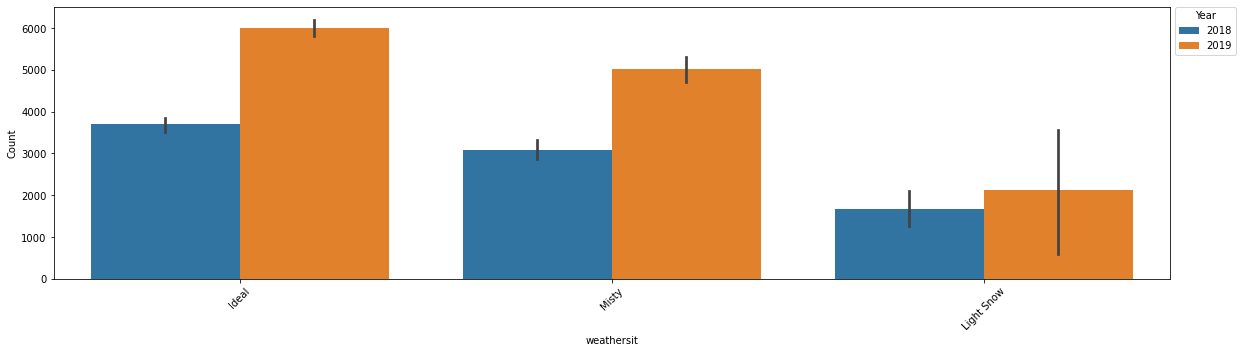

In [33]:
getGraph('weathersit', ['Ideal', 'Misty', 'Light Snow'], data)

Variable: <b>weathersit</b>
<br><u>Observations</u>:
<br>The pattern still holds in both years, though number of users in 2019 increased from 2018.
<br>Ideal and Misty situations attracts more than snowy situation usage.
<br>The percentage change in users increased in 2019 is more for Ideal and Misty situation as compared to lighly snow.
<br><u>Analysis</u>:
<br>Popularity increase might have caused more users to join in in 2019.
<br>Bike usage is much better during clear or near clear conditions rather than during snowy weather.
<br>The difference in percentage seems to be due to more understanding of the use case with experience.

## Step 2: Preparing the data

### function for making dummy variables

In [34]:
def make_dummy(data, col_name, colms=None, pref=None):
    df = pd.get_dummies(data[col_name], drop_first=True, prefix=pref)
#     if colms:
#         df.columns = colms
    data = pd.concat([data, df], axis=1)
    data.drop(col_name, axis=1, inplace=True)
    print(data.shape)
    return data

In [35]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### Making dummy variables for <b><u>season</u></b>:
   - 1 = Spring 
   - 2 = Summer
   - 3 = Fall
   - 4 = Winter

In [36]:
data.season = data.season.replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'])
data = make_dummy(data, 'season')
data.head()

(730, 13)


,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,1,0,0
1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,1,0,0
2,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0
3,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,1,0,0
4,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,1,0,0


In [37]:
data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Making dummy variables for <b><u>weathersit</u></b>:
   - 1. Ideal
   - 2. Misty
   - 3. Light Snow
   - 4. Heavy Snow

In [38]:
data.weathersit = data.weathersit.replace([1, 2, 3, 4], ['Ideal', 'Misty', 'Light Snow', 'Heavy Snow'])
data = make_dummy(data, 'weathersit')
data.head()

(730, 14)


,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,Misty
0,0,1,0,6,0,14.110847,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,2,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,3,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0


#### Making dummy variables for <b><u>weekday</u></b>:
   - 0 = Tuesday
   - 1 = Wednesday
   - 2 = Thursday
   - 3 = Friday
   - 4 = Saturday
   - 5 = Sunday
   - 6 = Monday

In [39]:
data.weekday = data.weekday.replace([0, 1, 2, 3, 4, 5, 6], ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday'])
data = make_dummy(data, 'weekday')
data.head()

(730, 19)


,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,Light Snow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0
1,0,1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0
2,0,1,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0


#### Making dummy variables for <b><u>mnth</u></b>:
   - 1  = Jan 
   - 2  = Feb
   - 3  = Mar
   - 4  = Apr   
   - 5  = May
   - 6  = Jun
   - 7  = Jul
   - 8  = Aug
   - 9  = Sep
   - 10 = Oct
   - 11 = Nov
   - 12 = Dec

In [40]:
data.mnth = data.mnth.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
data = make_dummy(data, 'mnth')
data.head()

(730, 29)


,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Spliting in train/test

In [41]:
train_data, test_data = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)
print(train_data.shape, test_data.shape)

(510, 29) (219, 29)


### Scaling numerical variables

Using minmax scaler on the numerical variables <u>temp, hum, windspeed, and cnt</u> here which makes the values fall between 0 and 1

In [42]:
scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed', 'cnt']
train_data[num_vars] = scaler.fit_transform(train_data[num_vars])
train_data.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking the correlation of the training data after scaling

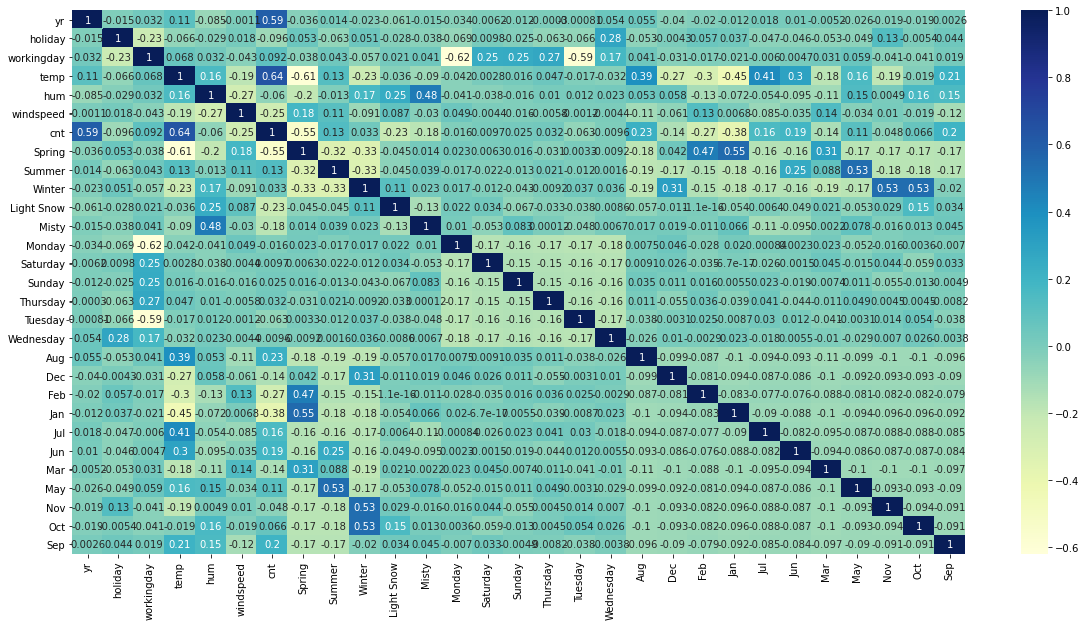

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Step 3: Building a Model

#### Function for model update and getting model summary + VIF

In [44]:
def runModel(X_train, col):
    X_train_rfe = X_train[col]

    X_train_rfe = sm.add_constant(X_train_rfe)

    lr = sm.OLS(y_train, X_train_rfe)
    lr_model = lr.fit()

    display(lr_model.summary())
    
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    display(vif)
    return X_train_rfe, lr_model

Getting X_train(features) and y_train(target) from train data

In [45]:
y_train = train_data.pop('cnt')
X_train = train_data

### Using RFE with 15 features and a step size of 35%

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15, step=0.35)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15, step=0.35)

List of the ranking of variables from RFE with their support and ranking

In [47]:
pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Variable', 'RFE Support', 'RFE Ranking'])

,Variable,RFE Support,RFE Ranking
0,yr,True,1
1,holiday,True,1
2,workingday,False,2
3,temp,True,1
4,hum,True,1
5,windspeed,True,1
6,Spring,True,1
7,Summer,False,2
8,Winter,True,1
9,Light Snow,True,1


We are gonna use only those variables that we got from RFE with support as TRUE

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Winter',
       'Light Snow', 'Misty', 'Monday', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

#### Model 1

Running the model with columns we got from RFE

In [49]:
X_train_rfe, lr_model = runModel(X_train, col)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          2.93e-188
Time:                        18:54:23   Log-Likelihood:                 512.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     494   BIC:                            -925.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3623      0.032     11.393      0.000       0.300       0.425
yr             0.2317      0.008     28.561      0.000       0.216       0.248
holiday       -0.0876      0.026     -3.400      0.001      -0.138      -0.037
temp           0.4344      0.033     13.188      0.000       0.370       0.499
hum           -0.1453      0.038     -3.848      0.000      -0.219      -0.071
windspeed     -0.1822      0.026     -7.079      0.000      -0.233      -0.132
Spring        -0.1009      0.015     -6.551      0.000      -0.131      -0.071
Winter         0.0732      0.014      5.188      0.000       0.046       0.101
Light Snow    -0.2552      0.026     -9.653      0.000      -0.307      -0.203
Misty         -0.0581      0.011     -5.526      0.000      -0.079      -0.037
Monday         0.0181      0.011      1.632      0.103      -0.004       0.040
Dec           -0.0466      0.017     -2.697      0.007      -0.080      -0.013
Jan           -0.0513      0.018     -2.848      0.005      -0.087      -0.016
Jul           -0.0723      0.017     -4.204      0.000      -0.106      -0.039
Nov           -0.0491      0.019     -2.649      0.008      -0.085      -0.013
Sep            0.0565      0.016      3.638      0.000       0.026       0.087
==============================================================================
Omnibus:                       73.583   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.671
Skew:                          -0.739   Prob(JB):                     2.16e-40
Kurtosis:                       5.532   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,hum,24.57
2,temp,16.88
4,windspeed,4.10
6,Winter,2.98
5,Spring,2.94
8,Misty,2.26
0,yr,2.07
13,Nov,1.82
11,Jan,1.75
10,Dec,1.54


#### Model 2

#### Dropping Monday due to high p-value
We can see the p-value for Monday is 0.103 that is greater than 0.05<br>
Running the model again after removing it.

In [50]:
X = X_train[col].drop('Monday', axis=1)
X_train_rfe, lr_model = runModel(X, X.columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          7.80e-189
Time:                        18:54:23   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3665      0.032     11.546      0.000       0.304       0.429
yr             0.2312      0.008     28.474      0.000       0.215       0.247
holiday       -0.0905      0.026     -3.517      0.000      -0.141      -0.040
temp           0.4345      0.033     13.169      0.000       0.370       0.499
hum           -0.1486      0.038     -3.936      0.000      -0.223      -0.074
windspeed     -0.1808      0.026     -7.015      0.000      -0.231      -0.130
Spring        -0.1008      0.015     -6.537      0.000      -0.131      -0.071
Winter         0.0737      0.014      5.216      0.000       0.046       0.102
Light Snow    -0.2538      0.026     -9.588      0.000      -0.306      -0.202
Misty         -0.0574      0.011     -5.461      0.000      -0.078      -0.037
Dec           -0.0455      0.017     -2.635      0.009      -0.079      -0.012
Jan           -0.0507      0.018     -2.810      0.005      -0.086      -0.015
Jul           -0.0720      0.017     -4.180      0.000      -0.106      -0.038
Nov           -0.0494      0.019     -2.664      0.008      -0.086      -0.013
Sep            0.0568      0.016      3.656      0.000       0.026       0.087
==============================================================================
Omnibus:                       67.521   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.080
Skew:                          -0.665   Prob(JB):                     5.82e-39
Kurtosis:                       5.553   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
3,hum,24.57
2,temp,16.83
4,windspeed,4.07
6,Winter,2.97
5,Spring,2.94
8,Misty,2.26
0,yr,2.07
12,Nov,1.82
10,Jan,1.74
9,Dec,1.54


#### Model 3

#### Dropping hum due to high VIF
All the p-values seems to under control, so we now look at VIF values<br>
We can see the VIF for hum is 24.57(highest)<br>
Running the model again after removing it.

In [51]:
X = X.drop('hum', axis=1)
X_train_rfe, lr_model = runModel(X, X.columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Wed, 12 Oct 2022   Prob (F-statistic):          1.08e-186
Time:                        18:54:23   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.000       0.240       0.339
yr             0.2348      0.008     28.679      0.000       0.219       0.251
holiday       -0.0913      0.026     -3.496      0.001      -0.143      -0.040
temp           0.4026      0.032     12.407      0.000       0.339       0.466
windspeed     -0.1540      0.025     -6.108      0.000      -0.204      -0.104
Spring        -0.1034      0.016     -6.613      0.000      -0.134      -0.073
Winter         0.0650      0.014      4.588      0.000       0.037       0.093
Light Snow    -0.2949      0.025    -11.954      0.000      -0.343      -0.246
Misty         -0.0812      0.009     -9.297      0.000      -0.098      -0.064
Dec           -0.0510      0.017     -2.918      0.004      -0.085      -0.017
Jan           -0.0556      0.018     -3.047      0.002      -0.091      -0.020
Jul           -0.0643      0.017     -3.705      0.000      -0.098      -0.030
Nov           -0.0488      0.019     -2.593      0.010      -0.086      -0.012
Sep            0.0537      0.016      3.409      0.001       0.023       0.085
==============================================================================
Omnibus:                       70.900   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.224
Skew:                          -0.695   Prob(JB):                     3.65e-41
Kurtosis:                       5.614   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,Winter,2.54
4,Spring,2.36
0,yr,2.06
11,Nov,1.80
9,Jan,1.65
7,Misty,1.53
8,Dec,1.46
10,Jul,1.36


Getting a correlation matrix to check out the final variables

<AxesSubplot:>

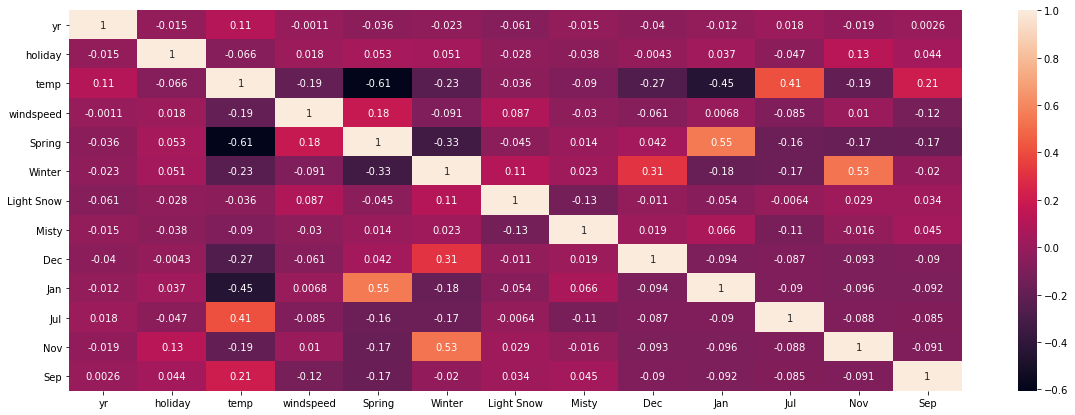

In [52]:
plt.figure(figsize=(20, 7))
sns.heatmap(X.corr(), annot=True)

### Our Final Model - Model 3
We can see that all the p-values seems to be under control<br>
VIF values are also under 5<br>
Adjust R-sq value is 83.4% (our first model was at 84.4%)<br>
Our Prob(Fstats) value is at almost 0<br><br>
With all the above we can see our model is ready to be evaluated

In [53]:
def getEquation(lr_model):
    equation = []
    for i, j in lr_model.params.items():
        x = str(round(j, 2))
        if (i == 'const'):
            i = '' 
        if (j>0):
            x = '+'+x
        equation.append(x+i)
    print(''.join(equation))
# lr_model.pvalues

In [54]:
getEquation(lr_model)

+0.29+0.23yr-0.09holiday+0.4temp-0.15windspeed-0.1Spring+0.06Winter-0.29Light Snow-0.08Misty-0.05Dec-0.06Jan-0.06Jul-0.05Nov+0.05Sep


Variable: <b>yr</b>
<br><u>Explaination</u>:
<br>Denotes the year 0: 2018, 1: 2019
<br>It has a positive relation with our dependent variable with a coefficient of 0.23

Variable: <b>holiday</b>
<br><u>Explaination</u>:
<br>Denotes whether a day is holiday or not 0: Not Holiday, 1: Holiday
<br>It has a negative relation with our dependent variable with a coefficient of -0.09

Variable: <b>temp</b>
<br><u>Explaination</u>:
<br>Denotes the temperature
<br>It has a positive relation with our dependent variable with a coefficient of 0.4

Variable: <b>windspeed</b>
<br><u>Explaination</u>:
<br>Denotes the windspeed
<br>It has a negative relation with our dependent variable with a coefficient of -0.15

Variable: <b>Spring</b>
<br><u>Explaination</u>:
<br>Denotes whether the season is Spring or not 0: Not Spring, 1: Spring
<br>It has a negative relation with our dependent variable with a coefficient of -0.1

Variable: <b>Winter</b>
<br><u>Explaination</u>:
<br>Denotes whether the season is Winter or not 0: Not Winter, 1: Winter
<br>It has a positive relation with our dependent variable with a coefficient of 0.06

Variable: <b>Light Snow</b>
<br><u>Explaination</u>:
<br>Denotes whether the weather situation is light snow or not 0: Not light snow, 1: light snow
<br>It has a negative relation with our dependent variable with a coefficient of -0.29

Variable: <b>Misty</b>
<br><u>Explaination</u>:
<br>Denotes whether the weather situation is misty or not 0: Not misty, 1: misty
<br>It has a negative relation with our dependent variable with a coefficient of -0.08

Variable: <b>Dec</b>
<br><u>Explaination</u>:
<br>Denotes whether the month is December or not 0: Not December, 1: December
<br>It has a negative relation with our dependent variable with a coefficient of -0.05

Variable: <b>Jan</b>
<br><u>Explaination</u>:
<br>Denotes whether the month is January or not 0: Not January, 1: January
<br>It has a negative relation with our dependent variable with a coefficient of -0.06

Variable: <b>Jul</b>
<br><u>Explaination</u>:
<br>Denotes whether the month is July or not 0: Not July, 1: July
<br>It has a negative relation with our dependent variable with a coefficient of -0.06

Variable: <b>Nov</b>
<br><u>Explaination</u>:
<br>Denotes whether the month is November or not 0: Not November, 1: November
<br>It has a negative relation with our dependent variable with a coefficient of -0.05

Variable: <b>Sep</b>
<br><u>Explaination</u>:
<br>Denotes whether the month is September or not 0: Not September, 1: September
<br>It has a positive relation with our dependent variable with a coefficient of 0.05

Top 3 Variables are: 
   - <b>temp</b>
   - <b>light snow</b>    
   - <b>yr</b>    
   
Our model should be able to explain the dependent variable, i.e., <u>cnt</u> using all of these variable mentioned above in a linear fashion using the above variables and ther coefficients.
The intercpt, i.e inital count will be exlained by the constant 0.29.

## Our Linear Regression Equation
y = 0.29 + 0.23yr - 0.09holiday + 0.4temp - 0.15windspeed - 0.1Spring + 0.06Winter - 0.29Light Snow - 0.08Misty - 0.05Dec - 0.06Jan - 0.06Jul - 0.05Nov + 0.05Sep

## Step 4: Residual Analysis

In [55]:
y_train_pred = lr_model.predict(X_train_rfe)

### Assumption 2: Normality of error: 
This is a good point to check if the other assumptions we made holds

Mean of residual: -6.627051848461044e-16
Std Deviation of residual: 0.09020358285519825


<AxesSubplot:ylabel='Density'>

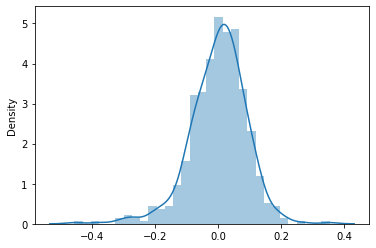

In [56]:
res = y_train-y_train_pred
print("Mean of residual: {}".format(np.mean(y_train-y_train_pred)))
print("Std Deviation of residual: {}".format(np.std(res)))
sns.distplot(res)

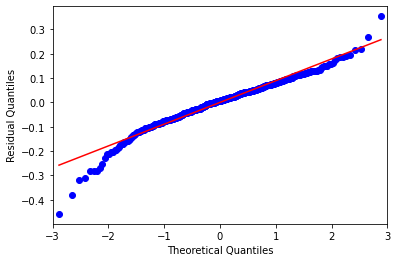

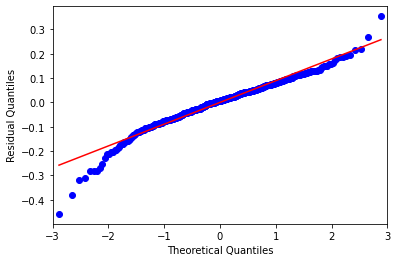

In [57]:
sm.qqplot(res, ylabel = "Residual Quantiles", line="r")

qqplot roughly follows a straight line - proving normality<br>
We can see mean of residual is -6.62^-16, i.e almost zero<br>
SD is close to 1<br>

### Thus our Assumption 2 holds

### Assumption 3: Homoscedasticity

Text(0.5, 0, 'Y Predicted Values')

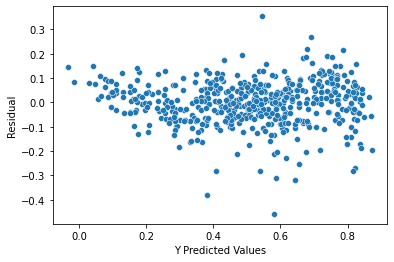

In [58]:
sns.scatterplot(y=res, x=y_train_pred)
plt.ylabel('Residual')
plt.xlabel('Y Predicted Values')

The data is following homoscedasticity, thus conforming our <b>Assumption 3</b>

### Assumption 4: Independence of error

The Graph above proves the independence of error too.<br>
Thus satisfing the <b>Assumption 4</b>

## Step 4: Prediction on evaluation set

Before testing we need to scale our test data too on our previously fitted scale

In [59]:
test_data[num_vars] = scaler.transform(test_data[num_vars])
test_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
test_data.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Getting X_test(features) and y_test(target) from test data

In [61]:
y_test = test_data.pop('cnt')
X_test = test_data

Taking the columns that we finally had after preparing our model in X_test

In [62]:
X_test = X_test[X.columns]

Adding constant and running prediction

In [63]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

# Results

In [64]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8161282341346277

### Accuracy of our model

In [65]:
print("Accuracy of our Model {}%".format(r2_score(y_true=y_test, y_pred=y_test_pred)*100))

Accuracy of our Model 81.61282341346276%


To check how well our model fit the data

<AxesSubplot:ylabel='cnt'>

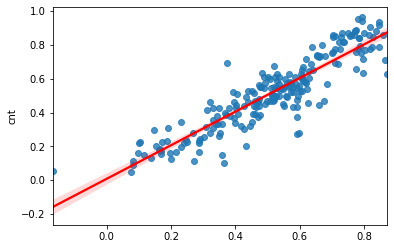

In [66]:
#on test data
sns.regplot(y=y_test, x=y_test_pred, line_kws={"color": 'red'})

<AxesSubplot:ylabel='cnt'>

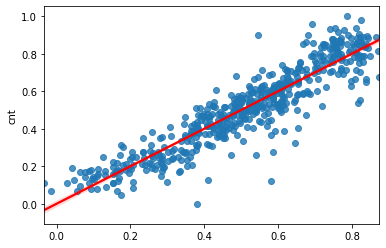

In [67]:
#on train data
sns.regplot(y=y_train, x=y_train_pred, line_kws={"color": 'red'})

## Observations:
   - Our model was able to predict well, it has an accuracy of 81.61%
   - Now we can use this final model to conclude and achieve our business goal

In [68]:
lr_model.params

const         0.289327
yr            0.234795
holiday      -0.091280
temp          0.402583
windspeed    -0.154010
Spring       -0.103373
Winter        0.064977
Light Snow   -0.294885
Misty        -0.081190
Dec          -0.050984
Jan          -0.055626
Jul          -0.064343
Nov          -0.048827
Sep           0.053670
dtype: float64

## Conclusion
   - Boom Bikes started with already a market for bike rentals as explained by the <u>const as 0.289327</u>. Thus the market can reboot easily.
   - They can work on increase on promotions and other expansions during the months <u>from May to Spetember</u> as there seem to be more number of users during this time, so they can increase their revenues and business.
   - This also shows that the market reacts good to the passing of time of the bikes in the market as clearly seen by the graphs and increase in number of users in 2019 fro 2018. This is also explained by the factor of coefficient that allows us to see that with passing year the increament will be with 0.234785.
   - They should focus on ideal and misty weather conditions, as it is clear by our study that people prefer to rent bikes more during these situations. (Coefficiently this is explained by the <u>temp</u> and <u>Light Snow</u> variables).
   - We clearly see the usage of bike is quite constant (looking the usage though working day, holidays and week days variables), thus it is a good sign for the company.
   - Here we noticed that the users seems to have a slight higher usage during non holidays days, so maybe the company can focus on having offers or promotions for that.